<a href="https://colab.research.google.com/github/mariyagolchin/Breast-cancer-prediction-using-machine-learning/blob/main/Breast_cancer_diagnosis_using_Machine_Learnin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://github.com/Piyush-Bhardwaj/Breast-cancer-diagnosis-using-Machine-Learning


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Importing the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score

In [4]:

# Importing the dataset

df = pd.read_csv('/content/drive/MyDrive/KaggleData/ Breast-cancer-data/cancer.csv')
df.head()


,id,clump_thickness,unif_cell_size,unif_cell_shape,marg_adhesion,single_epith_cell_size,bare_nuclei,bland_chrom,norm_nucleoli,mitoses,classes
0,1000025,5,1,1,1,2,1,3,1,1,0
1,1002945,5,4,4,5,7,10,3,2,1,0
2,1015425,3,1,1,1,2,2,3,1,1,0
3,1016277,6,8,8,1,3,4,3,7,1,0
4,1017023,4,1,1,3,2,1,3,1,1,0


In [5]:
df.replace('?',-99999,inplace=True)
df.drop(['id'],1,inplace=True)

X=np.array(df.drop(['classes'],1))
y=np.array(df['classes'])

In [6]:
# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.35, random_state = 42)

In [7]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [8]:

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.fit_transform(X_test)
explained_variance=pca.explained_variance_ratio_

[[154  10]
 [  9  72]]
Accuracy score of train KNN
100.0
Accuracy score of test KNN
92.24489795918367
[[160   4]
 [ 15  66]]
Accuracy score of train KNN
97.79735682819384
Accuracy score of test KNN
92.24489795918367
[[160   4]
 [  7  74]]
Accuracy score of train KNN
96.91629955947137
Accuracy score of test KNN
95.51020408163265
[[160   4]
 [  7  74]]
Accuracy score of train KNN
96.47577092511013
Accuracy score of test KNN
95.51020408163265
[[160   4]
 [  2  79]]
Accuracy score of train KNN
96.69603524229075
Accuracy score of test KNN
97.55102040816327
[[160   4]
 [  2  79]]
Accuracy score of train KNN
96.69603524229075
Accuracy score of test KNN
97.55102040816327
[[160   4]
 [  2  79]]
Accuracy score of train KNN
96.69603524229075
Accuracy score of test KNN
97.55102040816327
[[160   4]
 [  2  79]]
Accuracy score of train KNN
96.91629955947137
Accuracy score of test KNN
97.55102040816327
[[160   4]
 [  2  79]]
Accuracy score of train KNN
96.69603524229075
Accuracy score of test KNN
97.5

Text(0, 0.5, 'Accuracy')

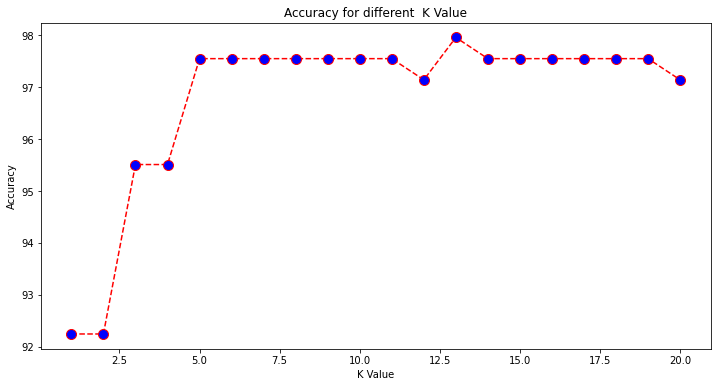

In [9]:

# Fitting KNN to the Training set

from sklearn.neighbors import KNeighborsClassifier
knn = []
for i in range(1,21):
            
    classifier = KNeighborsClassifier(n_neighbors=i)
    trained_model=classifier.fit(X_train,y_train)
    trained_model.fit(X_train,y_train )
    
    # Predicting the Test set results
    
    y_pred = classifier.predict(X_test)
    
    # Making the Confusion Matrix
    
    from sklearn.metrics import confusion_matrix
    
    cm_KNN = confusion_matrix(y_test, y_pred)
    print(cm_KNN)
    print("Accuracy score of train KNN")
    print(accuracy_score(y_train, trained_model.predict(X_train))*100)
    
    print("Accuracy score of test KNN")
    print(accuracy_score(y_test, y_pred)*100)
    
    knn.append(accuracy_score(y_test, y_pred)*100)
    
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 21),knn, color='red', linestyle='dashed', marker='o',  
             markerfacecolor='blue', markersize=10)
plt.title('Accuracy for different  K Value')  
plt.xlabel('K Value')  
plt.ylabel('Accuracy') 

In [11]:
# Fitting SVM to the Training set

from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)

trained_model=classifier.fit(X_train,y_train)
trained_model.fit(X_train,y_train )


# Predicting the Test set results

y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1])

In [12]:
# Making the Confusion Matrix

from sklearn.metrics import confusion_matrix
cm_SVM = confusion_matrix(y_test, y_pred)
print(cm_SVM)
print("Accuracy score of train SVM")
print(accuracy_score(y_train, trained_model.predict(X_train))*100)

print("Accuracy score of test SVM")
print(accuracy_score(y_test, y_pred)*100)


[[160   4]
 [  4  77]]
Accuracy score of train SVM
96.47577092511013
Accuracy score of test SVM
96.73469387755102
